# Homework 7 Notebook






This week's homework comprises a short warmup (Part 1), a code cell on selection (Part 2), one short answer question based on that code cell (Part 3), a very short question (Part 4), and a reading and short essay question (Part 5).

<font color="dodgerblue">**Submitting**</font>

As in previous weeks, use this notebook as a template to
+ make your own copy
+ when you have worked through the five facets of the assignment:
  + share your notebook with `zdodds@gmail.com` and `ranlibeskindhadas@gmail.com`
  + and submit its url, _your copy's url_, to the usual spot on Canvas


**Selection Pressure**

In lab, you explored the effects of genetic drift using Shmoodies as our model organism. Now we'll introduce selection pressure into our model. It has been found that the `A` allele confers Shmoodies with high degree of immunity to a particular disease whereas the `B` allele does not. In particular, Shmoodies with the `A` allele have probability $p$ of living to reproductive age whereas Shmoodies with the `B` allele have probability $q$ of living to reprodutive age. We'll explore the impacts of these probabilities $p$ and $q$ in our experiments, but as probabilities they must be between $0$ and $1$ and, presumably, $p$ is close to $1.0$. Moreover, we should assume that $q < p$.

Before we get started, let's take an aside on probabilities. Recall that in our absent-minded professor problem, the probability of a left move and right move was the same: $0.5$ probability for each of those two options. Imagine instead that the probability of a left move is $p$ (and, thus the probability of a right move is $1-p$). We'd like to simulate $n$ steps in the random walk process where the left and right moves have probabilities $p$ and $1-p$ respectively, rather than $0.5$ and $0.5$ as before. We can no longer use `random.choice` because that function chooses options from a list with equal probability. Instead, we generate a number at random between $0.0$ and $1.0$ using `random.random()`. If that value is less than or equal to $p$, we generate a left move and otherwise we generate a right move. The code cell demonstrates this. Try it out with different values of $p$ between $0.0$ and $1.0$. Pause for a moment to explain to yourself why this works to generate a left move with probability $p$.

In [ ]:
import random
import time

def biasedRandomWalk(p, numSteps):
  """ Performs a biased random walk in which the probability of a left step is p
      and the probability of a right step is (1-p). Iterates numSteps times
      and prints Left or Right at each step. """

  for i in range(numSteps):
    if random.uniform(0,1) <= p:
      print("Left")
    else:
      print("Right")
    # pause for a second... well, .46 of a second:
    time.sleep(.46)

# test with a 0.3 chance (30%) of moving left for 10 steps
biasedRandomWalk(0.3, 10)

Left
Left
Right
Left
Left
Left
Right
Right
Left
Left


<font color="firebrick">**Part 1**</font> In the code cell below is another version of the biased random walk that takes the probability `p` of a left (-1) move as input and takes a positive integer distance `d` as input. It then performs the random walk until the walker has veered distance `d` from the start position - that is, until the position of the walker is either `-d` or `d`.

Here are your tasks:
   1. There is a small bug in the `biasedRandomWalk` function. You'll need to fix just one item in one line of code.
   2. Write the code for the `experiment(numTrials, p, d)` function which runs `numTrials` trials of the biased random walk and returns the list of numbers of steps taken by the random walker for each of those trials.

In [ ]:
import random
import statistics

#random.seed(46)

def biasedRandomWalk1(p, d):
  """ Performs a biased random walk in which the probability of a left (-1) step
      is p and the probability of a right step is (1-p). Returns the number of
      steps taken until the walker has moved d steps away from the start
      position.
  """

  location = 0
  counter = 0
  while -d < location < d:
    counter += 1
    if random.uniform(0,1) <= p:
      location -= 1
    else:
      location += 1
  return counter

def experiment(numTrials, p, d):
  """ Performs numTrials trials of the biasedRandomWalk with parameters p and d
      and returns the list of the number of steps taken in each of those walks.
  """
  listOutput = []
  for i in range(numTrials):
    listOutput.append(biasedRandomWalk1(p,d))
  return listOutput


 #The first test will give a result of 25.4 when the random.seed(46) is used
exp1 = experiment(100, 0.5, 5)
print("Mean number of steps p = 0.5, d = 5: ", statistics.mean(exp1))
exp2 = experiment(100, 0.4, 5)
print("Mean number of steps p = 0.4, d = 5: ", statistics.mean(exp2))
exp3 = experiment(100, 0.3, 5)
print("Mean number of steps p = 0.3, d = 5: ", statistics.mean(exp3))



Mean number of steps p = 0.5, d = 5:  24.24
Mean number of steps p = 0.4, d = 5:  16.64
Mean number of steps p = 0.3, d = 5:  12.76


**Survivor!** Here's another example of the use of random numbers to do something with a particular probability. The `surviveToReproduce` function takes an `input` list of A's and B's as input as well as two probabilities, `p` and `q`. It then generates a new output list as follows: For each A organism in the input list, that A organism has probability `p` of surviving to reproduce and being added to the output list. For each B in the input list, that B has probability `q` of surviving to reproduce and being added to the output list.

<font color="firebrick">Try running it several times.</font> Notice that the subpopulation that survives to reproduce is generally smaller than the original population because, in this test, each A organism had a 0.9 chance (90%) of living to reproductive age and each B organism had a 0.3 chance(30%) of living to reproductive age. Fiddle with the values of `p` and `q` a bit just to see what happens.

In [ ]:
import random

def surviveToReproduce(input, p, q):
  ''' Takes as an input list of A's and B's
      and probabilities p and q. Returns a new output list generated
      by keeping each A with probability p and keeping each B with
      probability q.
  '''

  output = []
  for organism in input:
    if organism == 'A':
      if random.uniform(0,1) <= p:
        output.append(organism)
    else: # organism is 'B'
      if random.uniform(0,1) <= q:
        output.append(organism)
  return output

population = ['A']*10 + ['B']*10   # A list of 10 A's followed by 10 B's
print("The initial population is: ", population)
survivorsList = surviveToReproduce(population, 0.3, 0.3)
print("The subpopulation surviving to reproduce is: ", survivorsList)

The initial population is:  ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B']
The subpopulation surviving to reproduce is:  ['A', 'A', 'A', 'B', 'B', 'B', 'B']


<font color="firebrick">**Part 2**</font> Now, we'll implement a population genetics simulation for Shmoodies with natural selection.

Our main function, `plotGensSelection`, takes these inputs:
   * `Apop` and `Bpop`: The number of A and B alleles in the initial population, respectively;
   * `fitnessA` and `fitnessB`: The probability that A's and B's survive to sexual maturity, respectively. Each of these numbers is a probability and is therefore in the range from 0 to 1.
   * `numGens`: The number of generations to simulate.

1.  We start with a population (a list) of `Apop` A's and `Bpop` B's. Let `n` denote `Apop + Bpop`, the size of our population. Every generation will have size `n`.
2.  We record the fraction of A's in the population in another list, let's call it `fracAs`. (There no need to record the fraction of B's in the population.)
3.  We then call the `surviveToReproduce` function with our population and `fitnessA` and `fitnessB` values, resulting in some of the A's and B's not surviving to reproduce. Let's denote the list that is returned by the `surviveToReproduce` function the `survivorsList`. That's the list of organisms that will now have an opportunity to reproduce.
4. We construct a new population of the same size as the original population by choosing `n` elements at random from the `survivorsList`.
5. That new list becomes our new population. We go back to step 2 and repeat this process a total of `numGen` times.
6. Finally, we plot the `fracAs` list using matplotlib (don't forget to label the axes and include a title).





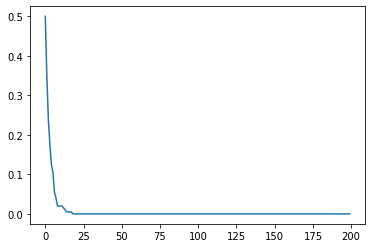

In [ ]:
import matplotlib.pyplot as plt  # This imports the tools that we need for plotting
import random


def surviveToReproduce(input, p, q):
  ''' Takes as an input list of A's and B's
      and probabilities p and q. Returns a new output list generated
      by keeping each A with probability p and keeping each B with
      probability q.
  '''

  output = []
  for organism in input:
    if organism == 'A':
      if random.uniform(0,1) <= p:
        output.append(organism)
    else: # organism is 'B'
      if random.uniform(0,1) <= q:
        output.append(organism)
  return output

def plotGensSelection(Apop, Bpop, fitnessA, fitnessB, numGens):
  ''' Inputs Apop and Bpop are the number of organisms with A and B alleles.
      Input fitnessA is the probability that A's live to reproductive age.
      Input fitnessB is the probability that B's live to reproductive age.
      numGens is the number of generations for the simulation.
      numTrials is the number of trials of the simulation.
      This function plots the fraction of organisms that have the A allele in
      each of numGens generations.
  '''
  currentGeneration=["A"]* Apop + ["B"]* Bpop
  n = Apop + Bpop
  fracAs= []
  for i in range(numGens):
    Apop = currentGeneration.count("A")
    Bpop = currentGeneration.count("B")
    calcAs = Apop/n
    fracAs.append(calcAs)
    nextGeneration = surviveToReproduce(currentGeneration, fitnessA, fitnessB )
    currentGeneration = nextGeneration
  return plt.plot(fracAs)

  # WRITE YOUR CODE BELOW

  # CHOOSE APPROPRIATE DESCRIPTIVE LABELS AND TITLE FOR THE GRAPH
  plt.xlabel("Generation")
  plt.ylabel("Fraction of Organisms with A Allele")
  plt.title("Fraction of Organisms with A Allele over Generations")
  plt.show()

plotGensSelection(100, 100, 0.7, 0.69, 200)


<font color="firebrick">**Part 3**</font> This is a short answer question. Notice that in the experiment above, the A allele has fitness 1.0 and the B allele has fitness 0.95 - not a very big difference!

  * Run the simulation above 10 times. _What fraction of those 10 random trials resulted in fixation to the A allele?_
  None of the trials
  * Now, change the line `plotGensSelection(100, 1000, 1.0, 0.95, 200)` that runs your experiment so that the A allele has fitness 0.7 and the B allele has fitness 0.69. Neither A nor B is perfectly fit, and the difference in fitness is very small. Run this again for 10 random trials. _In this text cell, briefly respond to the question "What fraction of those 10 random trials resulted in fixation to the A allele?_" (Note, some of your trials might not fix to A or B in 200 generations.)
  All of them resulted in fixation

<font color="firebrick">**Part 4**</font> An important part of science is asking questions. We'd like  you to share at least two questions that came up for _you_ in this course this week - in class, in lab, or on this homework. These can be anything of interest that you would be curious to learn more about at some point. Please place at least two such questions in this text cell.

  1. Your question here...
  2. Your question here...

## Misuse and Abuse of Science

In the second half of the semester, we'll be doing some writing about science, ethics, and society. This week, you'll be learning a bit about the misuse of scientific concepts and writing about that to a high school science audience. In subsequent weeks, you'll explore other issues and write for different audiences. This week, you'll notice that we've been quite explicit about the format and structure of the writing. This is just to help you with the organization of this first writing assignment. We'll be more relaxed about this in future writing assignments.

While science has the potential to do great good, there is a long history of misusing and abusing science to advance racist ideologies. One particularly striking example is the attempt to apply natural selection to justify the racist ideologies of Social Darwinism and eugenics.

<font color="firebrick">**Part 5**</font>

Take some time to explore these resources; it will probably take a total of about 45 minutes to read through them:
   * Fact sheet on [Eugenics and Scientific Racism ](https://www.genome.gov/about-genomics/fact-sheets/Eugenics-and-Scientific-Racism) from the National Institutes of Health
   * [In the Name of Darwin](http://www.pbs.org/wgbh/evolution/darwin/nameof/page03.html) by Dr. Daniel Keeves, Professor of History at Yale University
   * [Eugenics and Nazi Racial Hygiene](https://encyclopedia.ushmm.org/content/en/article/deadly-medicine-creating-the-master-race?series=18) from the United States Holocaust Museum (note that this site has seven web pages; at the bottom of each page is the link to the next one - please read at least the first three of them, but reading all of them will be informative!)
   * [What CRISPR-baby prison sentences mean for research](https://www.nature.com/articles/d41586-020-00001-y)

Your task here is to write a short essay intended for a sidebar in a high school biology text. The title of the sidebar article is "Social Darwinism and Eugenics" Here is the prompt in detail:

   * **Write your essay in the text cell below.**
   * Your essay should be between 450 and 550 words long.
   * You should assume that the essay is embedded in a chapter on evolution in a high school biology textbook. That chapter has already described the theory of evolution and Darwin's notion of survival of the fittest. You don't need to explain those concepts.
   * Your essay *should* begin with an introductory paragraph that explains the related (but not entirely identical) concepts of Social Darwinism and eugenics, briefly outlines the time periods in which these theories emerged and their role in the Nazi movement in Germany and in advancing racist ideologies in the United States.
   * In the next paragraph, describe Social Darwinism in more detail and why its tenets do not follow from Darwin's theory of evolution.
   * In the following paragraph, describe the eugenics movement which followed from Social Darwinism and the role of scientists and medical doctors in atrocities ranging from forced sterilization to genocide.
   * Next, briefly describe the CRISPR-baby "scandal", how it relates to the issues in the previous paragraphs, and the issues that it raises for the future of genetic engineering.
   * Finally, in your conclusion paragraph, briefly summarize the key learning outcomes that you wish for the reader to take away.

Here's the rubric that we'll use to grade this essay (with each sub-bullet category graded on a scale of 1-3; with 3 being strong, 2 indicating a good start but with room for refinement, and 1 indicating a need for significant refinement):

*  Introduction provides a brief but clear overview of the topic and the rest of the essay
*   Body
   * Each paragraph begins with a topic sentence
   * Each paragraph supports the topic sentence
   * Paragraphs connect logically
* Grammar, style, and convention
   * Clear and concise prose, correct grammar and spelling
   * Appropriate language for this audience (avoids using technical terms except when previously defined and only when necessary)






Please write your essay here.



Social Darwinism and eugenics are theories that attempt to use the scientific concepts of natural selection and the survival of the fittest to justify political, economic, and sociological doctrines.  Social Darwinism was first introduced after the publication of Darwin’s On the Origin of Species and is now defined as the idea that the powerful in society are better and superior to the weak, largely due to being more “evolved”. eugenics was a movement that came out of Social Darwinism that gained track in the United States in the 20th century. Eugenicists believed that methods like involuntary sterilization, segregation, and social exclusion could lead to “racial improvement” by removing weaker and undesirable traits from society. In the United States, eugenics furthered a racist agenda, as eugenicists believed that black people were less intelligent, more criminal, and more likely to live in porverty than white people. American eugenics influenced people like Adolf Hitler. As a eugenicist himself, Adolf Hitler believed that the surivival of the “Aryan” race depended on purifying the country’s gene pool, and this led to the massacre of millions of people. Two centuries after inheritance and evolution were first introduced to the world, the topic remains highly relevant and charged with moral considerations.

Social Darwinism was a pseudo-scientific belief that misapplied Darwin’s ideas. Prominent social Darwinists, like Herbert Spencer, believed that some ethnic and class groups were either more or less evolutionarily advanced than others. Spencer also believed that learned qualities, like morality and industriousness, were passed down genetically. From this set of beliefs, a variety of economic and political theories arose, many of which opposed welfare and laws that helped the poor, criminals, workers, and any other ‘genetically weak’ groups survive. One of the biggest faults of Social Darwinism lies in the fact that human qualities like intelligence or situations like poverty and criminality are not explained by biology, and thus, can not be inherited. Furthermore, Darwin’s phrase “survival of the fittest” refers to biological traits that make a species survive its environment, and it is misapplied when it is used to further racist, immoral, and unscientific theories and practices that attempt to violate reproductive rights. Thus, Darwin’s revolutionary discoveries and theories were misapplied to further a scientifically inaccurate agenda.

The eugenics movement came out of Social Darwinism, and served as the basis for racist, ableist, and antisemtic movements in the United States and Nazi Germany. Eugenics in the United States gained track in the late 19th century. Large corporate foundations like the Carnegie Institution, Rockefeller Foundation, and the Harriman railroad fortune funded eugenics projects. By the early 20th century, there was a wide community of scientists and other professionals that promoted eugenic legislation; thirty-two states passed sterilization laws and at least sixty thousand people were unwillingly sterilized. The American eugenics movement specifically targeted the poor, black, and the “epileptic, imbecile or feeble-minded”.  In California, thirty thousand people were sterilized against their will. The impact of eugenics extended into Nazi Germany, where at least six million Jewish people were killed by Adolf Hitler in an attempt to “purify the Aryan race”. After the atrocities commited by the Nazi, eugenics fell largely out of popularity; however, the relevance of gene-editing for desirable characteristics has increased with the development of new technology.  

Gene editing has become a fiercely debated topic in the scientific community, largely due to CRISPR, which has enabled scientists to modify the genetic code. CRISPR technology is mainly used to further research into diseases like cancer and mental illnesses. In 2018, however, He Jiankui illegaly used the technology to modify human embrios. This created a wave of reactions that brought to the forefront the possibility of modifying the human genome. The fact that the modification of human DNA is possible raises a variety of questions about the morality of the practice. Among these: what is a desirable genome? Who gets access to the technology? What are the societal, political, and economic implications of having genetically modified humans? Despite the scientific breakthroughs that CRISPR entails, there are still many conversations to be had regarding its use.

The science of evolution and inheritance was first introduced to the world in the 19th century, primarily by the advancements made by Charles Darwin. His discoveries, however, were unscientifcaly and immoraly used to further exclusionary theories, legislations, and practices, like Social Darwinism and eugenics,  that resulted in the deaths and sterilizations of millions of people. As the understanding of the genetic code increases and the technology that allows for the modification of the genome becomes more accessible, many questions are, and should be, raised. In the 21st century, it is important to hold scientists and communities accountable to ensure that scientific knowledge is used morally and safely to further only the common good.
